# Data info

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
df=pd.read_csv("Energy Production Dataset.csv")

In [3]:
#%pip install matplotlib seaborn

In [4]:
df.head()

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387


In [5]:
df.columns

Index(['Date', 'Start_Hour', 'End_Hour', 'Source', 'Day_of_Year', 'Day_Name',
       'Month_Name', 'Season', 'Production'],
      dtype='object')

# Separate numeric and categorical Columns

In [6]:
num = df.select_dtypes(include="number") 
cat = df.select_dtypes(exclude="number")

In [7]:
num.shape

(51864, 4)

In [8]:
cat.shape

(51864, 5)

In [9]:
num.head()

,Start_Hour,End_Hour,Day_of_Year,Production
0,21,22,334,5281
1,18,19,334,3824
2,16,17,334,3824
3,23,0,334,6120
4,6,7,334,4387


In [10]:
cat

,Date,Source,Day_Name,Month_Name,Season
0,11/30/2025,Wind,Sunday,November,Fall
1,11/30/2025,Wind,Sunday,November,Fall
2,11/30/2025,Wind,Sunday,November,Fall
3,11/30/2025,Wind,Sunday,November,Fall
4,11/30/2025,Wind,Sunday,November,Fall
...,...,...,...,...,...
51859,1/1/2020,Wind,Wednesday,January,Winter
51860,1/1/2020,Wind,Wednesday,January,Winter
51861,1/1/2020,Wind,Wednesday,January,Winter
51862,1/1/2020,Solar,Wednesday,January,Winter


In [11]:
num.describe()

,Start_Hour,End_Hour,Day_of_Year,Production
count,51864.000000,51864.000000,51864.000000,51864.000000
mean,11.500000,11.500000,180.798415,6215.069933
std,6.922253,6.922253,104.291387,3978.364965
min,0.000000,0.000000,1.000000,58.000000
25%,5.750000,5.750000,91.000000,3111.000000
50%,11.500000,11.500000,181.000000,5372.000000
75%,17.250000,17.250000,271.000000,8501.000000
max,23.000000,23.000000,366.000000,23446.000000


In [12]:
round(num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Start_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
End_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Day_of_Year,51864.0,180.80,104.29,1.0,91.00,181.0,271.00,366.0
Production,51864.0,6215.07,3978.36,58.0,3111.00,5372.0,8501.00,23446.0


# Bivariated

Seasonal & Source Dynamics: How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

Long-Term Trends: Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

Monthly Consistency: Are production patterns consistent across the same month in different years, or do we observe significant anomalies driven by external factors (e.g., extreme weather events)?

### Source × Season

Business questions:

 - Is wind or solar more prevalent in certain seasons?
 - Is the energy mix seasonal?

In [13]:
# How many observations belong to this Season–Source combination?
ct_source_season = pd.crosstab(df["Season"], df["Source"])
ct_source_season

# Each number is a count of rows in your dataset

Source,Mixed,Solar,Wind
Season,,,
Fall,0,1961,11149
Spring,1,2547,10694
Summer,1,4172,9075
Winter,0,698,11566


In [14]:
# Create the contingency table with row percentages
 # - Within each season, what % is Wind vs Solar?
ct_source_season_pct = (
    pd.crosstab(df["Season"], df["Source"], normalize="index") * 100
)

ct_source_season_pct

Source,Mixed,Solar,Wind
Season,,,
Fall,0.000000,14.958047,85.041953
Spring,0.007552,19.234255,80.758194
Summer,0.007548,31.491546,68.500906
Winter,0.000000,5.691455,94.308545


This chart shows the relative frequency of energy source records across seasons. Solar records appear more frequently in summer, while wind records are more common in winter. This provides initial evidence of seasonal patterns in the dataset. Solar contribution peaks in summer (~31%) and drops sharply in winter (~6%), with spring and fall showing intermediate levels. This pattern reflects expected climatic effects and indicates a complementary relationship between wind and solar. The “Mixed” category is negligible and does not materially affect the energy mix.

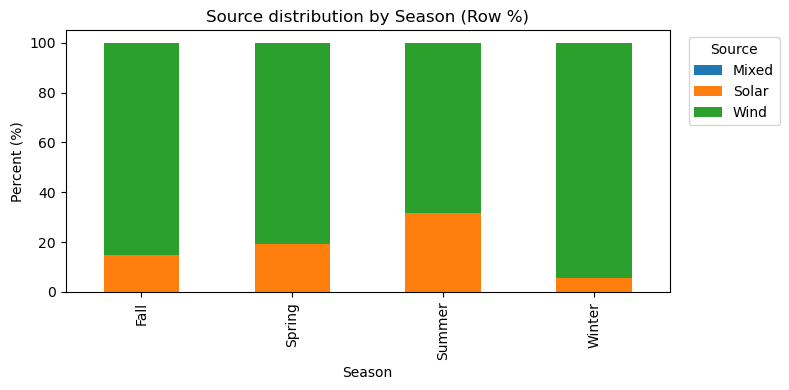

In [15]:
ax = ct_source_season_pct.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Source distribution by Season (Row %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

The stacked bar chart visually confirms a seasonally varying energy mix, with wind providing a stable baseline year-round and solar contributing significantly during summer months. The inverse seasonal behavior of wind and solar highlights their complementarity and supports a diversified energy portfolio to ensure consistent production across seasons.

### Source × Production (MOST IMPORTANT)

##### Wind vs Solar performance

Business questions:
 - Which source produces more on average?
 - Which is more variable?
 - Which has higher peak production?

In [ ]:
source_stats = df.groupby("Source")["Production"].agg(["count","mean","median","std","min","max"])
source_stats

,count,mean,median,std,min,max
Source,,,,,,
Mixed,2,1737.000000,1737.0,1418.456203,734,2740
Solar,9378,5793.845703,5500.5,2412.676179,267,16578
Wind,42484,6308.262593,5317.5,4241.262338,58,23446


The comparison of production by energy source shows that wind energy delivers higher average and peak production than solar, but with substantially greater variability. Solar energy exhibits lower volatility and a higher minimum production level, indicating more consistent output. These results suggest that wind offers higher upside potential, while solar provides greater production stability. The negligible number of “Mixed” observations prevents meaningful interpretation of that category.

<Figure size 700x300 with 0 Axes>

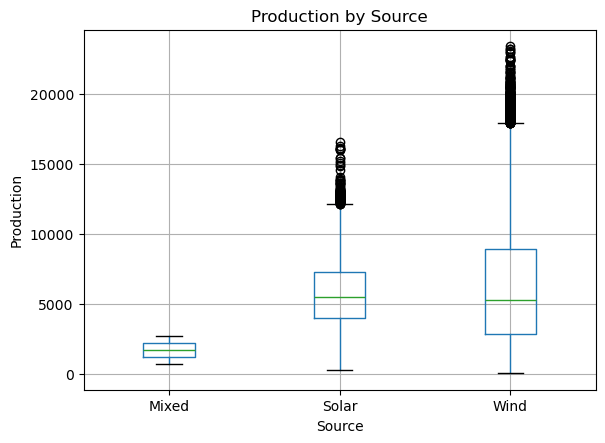

In [ ]:
plt.figure(figsize=(7,3))
df.boxplot(column="Production", by="Source")
plt.title("Production by Source")
plt.suptitle("")  # removes default pandas subtitle
plt.xlabel("Source")
plt.ylabel("Production")
plt.show()


Wind is a high-return, high-variability source and Solar is a more stable, lower-risk source

## Season × Production

Business questions
- Which seasons have highest production?
- How strong is seasonality?

In [ ]:
season_stats = df.groupby("Season")["Production"].agg(["count","mean","median","std"])
season_stats

,count,mean,median,std
Season,,,,
Fall,13110,6266.110908,5422.5,4114.098733
Spring,13242,6425.497130,5764.0,3734.353627
Summer,13248,4911.191878,4295.0,3045.166818
Winter,12264,7341.794684,6487.0,4540.105149


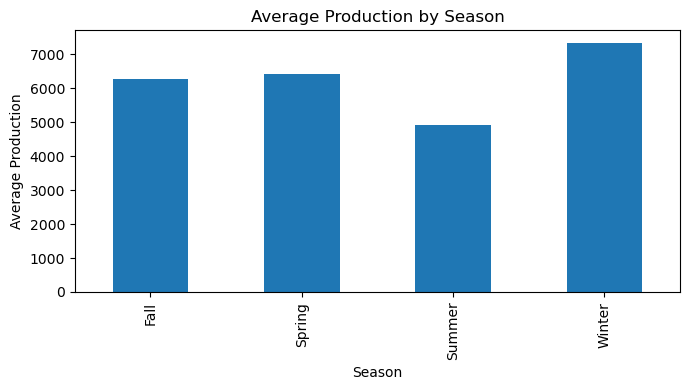

In [ ]:
season_mean = df.groupby("Season")["Production"].mean()

plt.figure(figsize=(7,4))
season_mean.plot(kind="bar")
plt.title("Average Production by Season")
plt.xlabel("Season")
plt.ylabel("Average Production")
plt.tight_layout()
plt.show()

<Figure size 900x300 with 0 Axes>

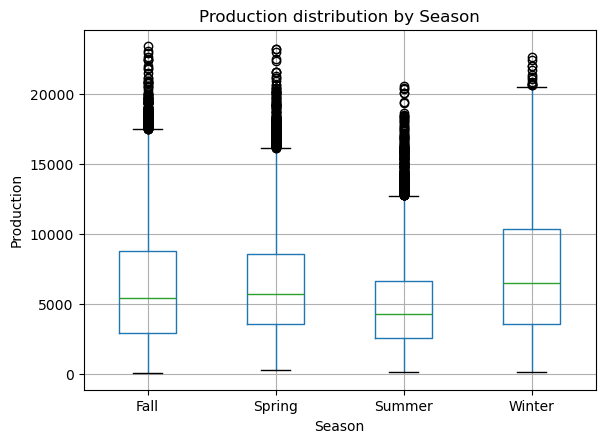

In [ ]:
plt.figure(figsize=(9,3))
df.boxplot(column="Production", by="Season")
plt.title("Production distribution by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Production")
plt.show()


Seasonal analysis of production shows a clear pattern, with winter exhibiting the highest average and median production levels, accompanied by greater variability. Summer displays the lowest production levels but also the lowest variability, indicating more stable output. Spring and fall represent intermediate cases with balanced performance. The consistency between mean and median values across seasons suggests that these differences are structural rather than driven by extreme outliers.

From the previus info we can see the prodction for each souce but not the relationship between them.

### Relationship

In [ ]:
season_source_stats = (
    df.groupby(["Season", "Source"])["Production"]
      .agg(["count", "mean", "median", "std"])
)

season_source_stats

count         mean  median          std
Season Source                                         
Fall   Solar    1961  5386.830189  5082.0  2327.507103
       Wind    11149  6420.767782  5581.0  4334.834702
Spring Mixed       1   734.000000   734.0          NaN
       Solar    2547  6009.738123  5753.0  2440.833148
       Wind    10694  6525.051057  5767.5  3974.388910
Summer Mixed       1  2740.000000  2740.0          NaN
       Solar    4172  6044.805369  5734.0  2418.667444
       Wind     9075  4390.281212  3484.0  3160.033830
Winter Solar     698  4649.541547  4370.0  1996.051987
       Wind    11566  7504.270275  6736.0  4599.198881

Average energy production varies across seasons, indicating that seasonal factors influence overall renewable output.

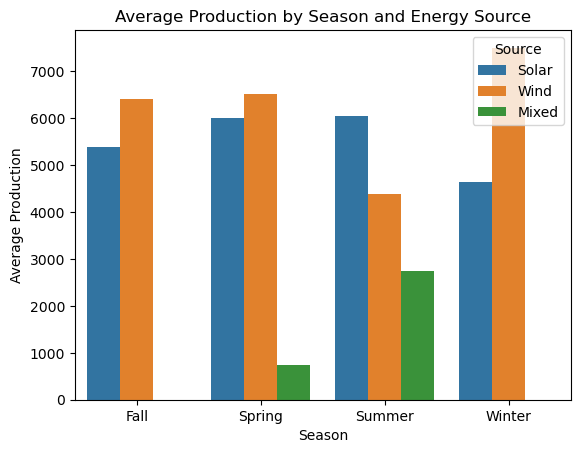

In [27]:
season_source_mean = (
    df.groupby(["Season", "Source"])["Production"]
      .mean()
      .reset_index()
)

import seaborn as sns

sns.barplot(
    data=season_source_mean,
    x="Season",
    y="Production",
    hue="Source"
)
plt.title("Average Production by Season and Energy Source")
plt.ylabel("Average Production")
plt.show()

What this confirms
 - Solar peaks in summer
 - Wind peaks in winter
 - They behave inversely across seasons

The figure shows that solar production is highest during summer, while wind production peaks in winter. This inverse seasonal pattern suggests that solar and wind complement each other over the year.

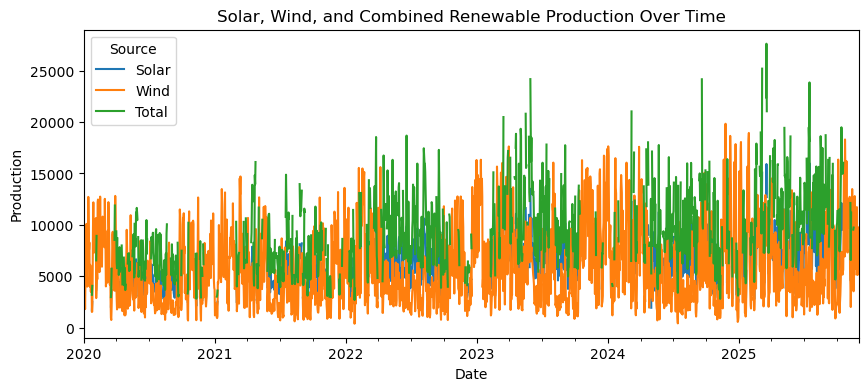

In [28]:
wide = df.pivot_table(
    index="Date",
    columns="Source",
    values="Production",
    aggfunc="mean"
)

wide["Total"] = wide["Solar"] + wide["Wind"]

wide[["Solar", "Wind", "Total"]].plot(figsize=(10,4))
plt.title("Solar, Wind, and Combined Renewable Production Over Time")
plt.ylabel("Production")
plt.show()

While solar and wind individually show high variability, their combined output is smoother over time, indicating reduced variability and improved grid stability

Final conclusions

Exploratory data analysis reveals clear seasonal patterns in renewable energy production. Solar energy peaks during summer months, while wind energy shows higher production in winter. When combined, the total renewable output exhibits reduced variability compared to individual sources. This complementary behavior suggests that integrating solar and wind can enhance grid stability.